In [2]:
import pandas as pd
import operator
import random
import math

In [3]:
data = pd.read_csv("./movieLensSmall/ratings.csv")

In [4]:
data
user_click = {}
for index, row in data.iterrows():
    user_click.setdefault(row.userId, [])
    user_click[row.userId].append(row.movieId)
    

In [5]:
def transfer_user_click(user_click):
    item_click = {}
    for user in user_click:
        click_list = user_click[user]
        for item in click_list:
            item_click.setdefault(item, [])
            item_click[item].append(user)
    return item_click

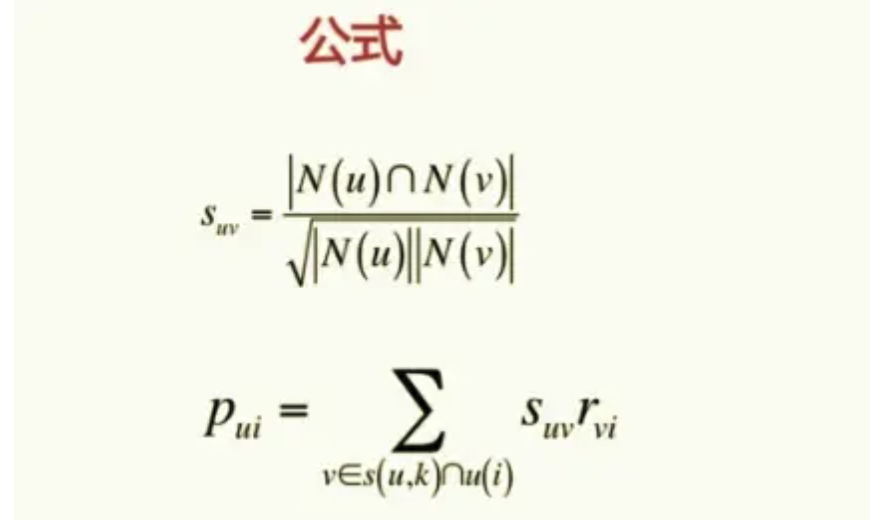

In [20]:
def cal_user_sim(item_click_by_user, user_click_log):
    user_co_appear = {}
    user_sim = {}
    user_sim_sorted = {}
    user_click_times = {}
    for itemid, userlist in item_click_by_user.items():
        for i in range(len(userlist)):
            user_i = userlist[i]
            user_co_appear.setdefault(user_i, {})
            user_click_times.setdefault(user_i, 0)
            user_click_times[user_i] += 1
            for j in range(i+1, len(userlist)):
                user_j = userlist[j]
                user_co_appear.setdefault(user_j, {})
                user_co_appear[user_i].setdefault(user_j, 0)
                user_co_appear[user_i][user_j] += 1
                user_co_appear[user_j].setdefault(user_i, 0)
                user_co_appear[user_j][user_i] += 1
    for user_i, user_i_co in user_co_appear.items():
        user_sim.setdefault(user_i, {})
        for user_j, co_times in user_i_co.items():
            user_sim[user_i][user_j] = co_times / math.sqrt(user_click_times[user_i] * user_click_times[user_j])
    for user_i, items in user_sim.items():
        user_sim_sorted[user_i] = sorted(items.items(), key = lambda x: x[1], reverse = True)
    return user_sim_sorted

In [21]:
data
user_click = {}
for index, row in data.iterrows():
    user_click.setdefault(row.userId, [])
    user_click[row.userId].append(row.movieId)

In [22]:
item_click = transfer_user_click(user_click)

In [23]:
user_sim = cal_user_sim(item_click, user_click)

In [24]:
user_sim[1]

[(313.0, 0.38097837645537314),
 (330.0, 0.33837054416284096),
 (57.0, 0.3370315470274015),
 (469.0, 0.33490545099315927),
 (39.0, 0.3348314037922925),
 (452.0, 0.33259278156261735),
 (45.0, 0.32867718573199894),
 (266.0, 0.3278646225623761),
 (368.0, 0.3243794729893913),
 (577.0, 0.3208002950429377),
 (64.0, 0.32050419243868405),
 (91.0, 0.3203376217431352),
 (217.0, 0.31820501234472615),
 (135.0, 0.3144444204243855),
 (590.0, 0.31145857161752355),
 (288.0, 0.31127948449934),
 (608.0, 0.30973793886348716),
 (160.0, 0.3077806870383793),
 (19.0, 0.30456742847401014),
 (202.0, 0.3041490281091405),
 (597.0, 0.2994507309235397),
 (480.0, 0.2951863161251216),
 (391.0, 0.29406614437298406),
 (607.0, 0.28806232038244695),
 (239.0, 0.28693053363725174),
 (226.0, 0.2857446471951251),
 (600.0, 0.2852167222649405),
 (68.0, 0.28483375537185496),
 (354.0, 0.28386715465014073),
 (96.0, 0.282482990888775),
 (234.0, 0.28177999549055077),
 (425.0, 0.2814858431944031),
 (561.0, 0.2804668594849937),
 (570